### Movie Recommendation System Using ML 

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


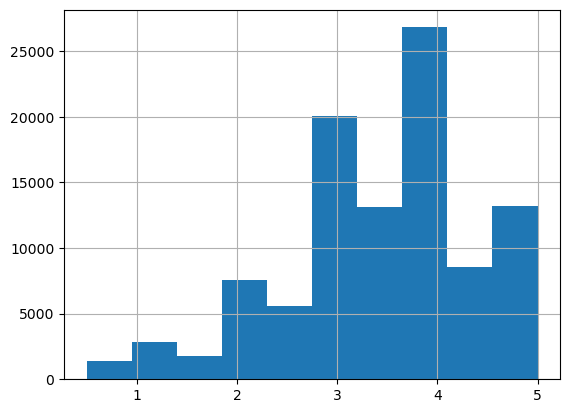

Computing the msd similarity matrix...
Done computing similarity matrix.
Predicted rating for user 1.0 and movie 1.0: 3.497659566028006
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8735  0.8840  0.8830  0.8683  0.8692  0.8756  0.0067  
MAE (testset)     0.6698  0.6799  0.6792  0.6670  0.6673  0.6726  0.0057  
Fit time          3.08    2.78    2.80    2.81    2.80    2.85    0.11    
Test time         0.30    0.56    0.31    0.32    0.52    0.40    0.11    
RMSE: 0.8722
Top 10 recommendations for user 1.0:


In [16]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split
from collections import defaultdict

# Load datasets
movies = pd.read_csv(r"C:\Users\LENOVO\Downloads\ml-latest-small\movies.csv")
ratings = pd.read_csv(r"C:\Users\LENOVO\Downloads\ml-latest-small\ratings.csv")

# Merge datasets
data = pd.merge(ratings, movies, on='movieId')
data.dropna(inplace=True)

# Display first few rows of the datasets
print(movies.head())
print(ratings.head())

# Display histogram of ratings
data['rating'].hist()
plt.show()

# Prepare the data for Surprise library
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(dataset, test_size=0.25)

# Define and train the KNNBasic algorithm
knn_algo = KNNBasic()
knn_algo.fit(trainset)

# Predict a rating for a specific user and movie
user_id = str(ratings_df.iloc[0]['userId'])  # Example user_id from your dataset
movie_id = str(ratings_df.iloc[0]['movieId'])  # Example movie_id from your dataset
pred = knn_algo.predict(user_id, movie_id)
print(f'Predicted rating for user {user_id} and movie {movie_id}: {pred.est}')

# Evaluate the SVD algorithm
svd_algo = SVD()
cross_validate(svd_algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train and evaluate the SVD algorithm on the test set
svd_algo.fit(trainset)
predictions = svd_algo.test(testset)
accuracy.rmse(predictions)

# Function to get top N recommendations
def get_top_n_recommendations(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Get top 10 recommendations for each user
top_n_recommendations = get_top_n_recommendations(predictions, n=10)

# Print top 10 recommendations for the first user in the dataset
first_user_id = str(ratings_df.iloc[0]['userId'])
print(f"Top 10 recommendations for user {first_user_id}:")
for movie_id, rating in top_n_recommendations[first_user_id]:
    movie_title = movies[movies['movieId'] == int(movie_id)]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {rating}")
